In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

df=pd.read_csv('PATH AND FILE', encoding='CP949')
font_name = font_manager.FontProperties(fname="PATH AND FONT").get_name()
rc('font', family=font_name)

df


,idx,area,pick_1,pick_2,pick_3,pick_4,pick_5,gameduration,first_blood,first_tower,tower_kills,first_inhibitor,first_rift,first_dragon,dragon_kills,first_baron,baron_kills,result
0,0,100,38,497,164,19,145,1514,True,True,2,False,True,False,1,False,0,Fail
1,1,200,114,876,4,57,21,1514,False,False,5,False,False,True,2,True,1,Win
2,2,100,64,22,99,131,57,2004,True,False,4,False,True,True,1,False,0,Fail
3,3,200,120,67,117,84,516,2004,False,True,6,True,False,False,4,True,1,Win
4,4,100,39,25,64,51,517,1610,True,False,1,False,True,False,0,False,0,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339657,339657,200,102,84,236,201,43,1964,False,False,5,True,False,True,2,False,1,Win
339658,339658,100,202,412,76,39,240,2362,True,True,8,True,True,False,4,True,2,Win
339659,339659,200,41,2,99,235,7,2362,False,False,3,False,False,True,2,False,0,Fail
339660,339660,100,875,30,91,51,114,2043,False,False,6,True,False,False,1,False,0,Fail


In [2]:
df.sort_values(by='gameduration', ascending=True)

,idx,area,pick_1,pick_2,pick_3,pick_4,pick_5,gameduration,first_blood,first_tower,tower_kills,first_inhibitor,first_rift,first_dragon,dragon_kills,first_baron,baron_kills,result
306693,306693,200,42,104,240,235,16,190,True,False,0,False,False,False,0,False,0,Win
88903,88903,200,876,236,43,86,22,190,True,False,0,False,False,False,0,False,0,Win
103535,103535,200,120,67,90,30,53,190,False,False,0,False,False,False,0,False,0,Win
103534,103534,100,19,517,81,164,117,190,True,False,0,False,False,False,0,False,0,Fail
13837,13837,200,145,80,266,104,91,190,False,False,0,False,False,False,0,False,0,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146713,146713,200,91,122,80,203,81,3397,True,False,11,True,False,False,2,False,3,Win
172929,172929,200,254,235,25,99,85,3451,True,False,6,False,False,False,5,True,3,Win
172928,172928,100,81,103,121,17,80,3451,False,True,11,True,True,True,4,False,1,Fail
125932,125932,100,22,111,238,141,84,3470,True,True,9,True,False,True,4,True,2,Fail


In [3]:
#15분미만 게임데이터 제외
df=df.drop(df[(df['gameduration']<=900)].index)
df

,idx,area,pick_1,pick_2,pick_3,pick_4,pick_5,gameduration,first_blood,first_tower,tower_kills,first_inhibitor,first_rift,first_dragon,dragon_kills,first_baron,baron_kills,result
0,0,100,38,497,164,19,145,1514,True,True,2,False,True,False,1,False,0,Fail
1,1,200,114,876,4,57,21,1514,False,False,5,False,False,True,2,True,1,Win
2,2,100,64,22,99,131,57,2004,True,False,4,False,True,True,1,False,0,Fail
3,3,200,120,67,117,84,516,2004,False,True,6,True,False,False,4,True,1,Win
4,4,100,39,25,64,51,517,1610,True,False,1,False,True,False,0,False,0,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339657,339657,200,102,84,236,201,43,1964,False,False,5,True,False,True,2,False,1,Win
339658,339658,100,202,412,76,39,240,2362,True,True,8,True,True,False,4,True,2,Win
339659,339659,200,41,2,99,235,7,2362,False,False,3,False,False,True,2,False,0,Fail
339660,339660,100,875,30,91,51,114,2043,False,False,6,True,False,False,1,False,0,Fail


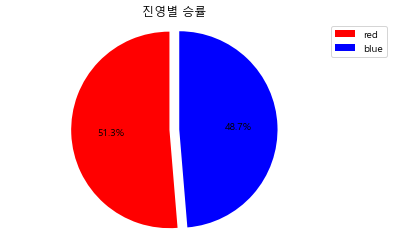

In [4]:
red_static=df.groupby(by=['area','result'])['area'].count().values[1]
blue_static=df.groupby(by=['area','result'])['area'].count().values[3]
values=[red_static, blue_static]
label=['red','blue']
explodes=(0,0.1)

plt.pie(values,
       autopct='%1.1f%%',
       colors=['red','blue'],
       startangle=90,
       explode=explodes)
plt.title('진영별 승률')
plt.axis('equal')
plt.legend(label, loc='upper right', bbox_to_anchor=(1.15,1))
plt.show()

In [5]:
print(red_static)
print(blue_static)
print(red_static+blue_static)

82390
78161
160551


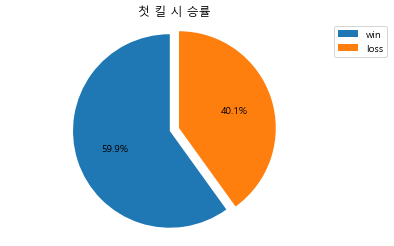

In [6]:
first_blood_fail=df.groupby(by=['first_blood','result'])['first_blood'].count().values[2]
first_blood_win=df.groupby(by=['first_blood','result'])['first_blood'].count().values[3]
values=[first_blood_win,first_blood_fail]
label=['win','loss']
explodes=(0,0.1)

plt.pie(values,
       autopct='%1.1f%%',
       startangle=90,
       explode=explodes)
plt.title('첫 킬 시 승률')
plt.axis('equal')
plt.legend(label, loc='upper right', bbox_to_anchor=(1.15,1))
plt.show()

In [7]:
#킬 없는 서렌은 없음
print(first_blood_fail)
print(first_blood_win)
print(first_blood_fail+first_blood_win)

64324
96227
160551


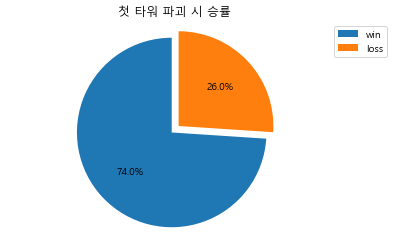

In [8]:
first_tower_fail=df.groupby(by=['first_tower','result'])['first_blood'].count().values[2]
first_tower_win=df.groupby(by=['first_tower','result'])['first_blood'].count().values[3]
values=[first_tower_win,first_tower_fail]
label=['win','loss']
explodes=(0,0.1)

plt.pie(values,
       autopct='%1.1f%%',
       startangle=90,
       explode=explodes)
plt.title('첫 타워 파괴 시 승률')
plt.axis('equal')
plt.legend(label, loc='upper right', bbox_to_anchor=(1.15,1))
plt.show()

In [9]:
#서렌 데이터 제외
#포탑 파괴 없이 서렌인 데이터 존재해서 제외
print(first_tower_fail)
print(first_tower_win)
print(first_tower_fail+first_tower_win)

41759
118578
160337


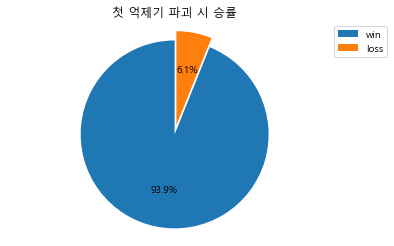

In [10]:
first_inhibitor_fail=df.groupby(by=['first_inhibitor','result'])['first_inhibitor'].count().values[2]
first_inhibitor_win=df.groupby(by=['first_inhibitor','result'])['first_inhibitor'].count().values[3]
values=[first_inhibitor_win,first_inhibitor_fail]
label=['win','loss']
explodes=(0,0.1)

plt.pie(values,
       autopct='%1.1f%%',
       startangle=90,
       explode=explodes)
plt.title('첫 억제기 파괴 시 승률')
plt.axis('equal')
plt.legend(label, loc='upper right', bbox_to_anchor=(1.15,1))
plt.show()

In [11]:
#억제기가 깨지지않은 서렌 데이터 제외
print(first_inhibitor_fail)
print(first_inhibitor_win)
print(first_inhibitor_fail+first_inhibitor_win)

7462
115124
122586


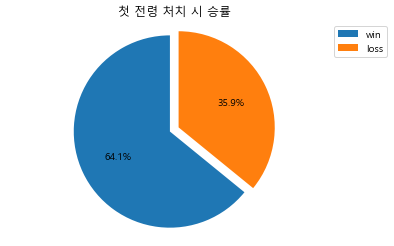

In [12]:
first_rift_fail=df.groupby(by=['first_rift','result'])['first_rift'].count().values[2]
first_rift_win=df.groupby(by=['first_rift','result'])['first_rift'].count().values[3]
values=[first_rift_win,first_rift_fail]
label=['win','loss']
explodes=(0,0.1)

plt.pie(values,
       autopct='%1.1f%%',
       startangle=90,
       explode=explodes)
plt.title('첫 전령 처치 시 승률')
plt.axis('equal')
plt.legend(label, loc='upper right', bbox_to_anchor=(1.15,1))
plt.show()

In [13]:
#전령을 처치하지 않은 데이터 제외
print(first_rift_fail)
print(first_rift_win)
print(first_rift_fail+first_rift_win)

56268
100540
156808


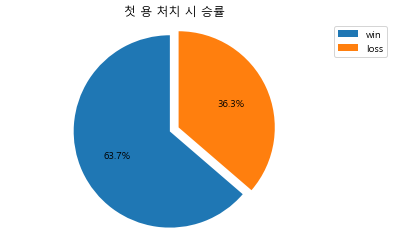

In [14]:
first_dragon_fail=df.groupby(by=['first_dragon','result'])['first_dragon'].count().values[2]
first_dragon_win=df.groupby(by=['first_dragon','result'])['first_dragon'].count().values[3]
values=[first_dragon_win,first_dragon_fail]
label=['win','loss']
explodes=(0,0.1)

plt.pie(values,
       autopct='%1.1f%%',
       startangle=90,
       explode=explodes)
plt.title('첫 용 처치 시 승률')
plt.axis('equal')
plt.legend(label, loc='upper right', bbox_to_anchor=(1.15,1))
plt.show()

In [15]:
#용을 처치하지 않은 데이터 제외
print(first_dragon_fail)
print(first_dragon_win)
print(first_dragon_fail+first_dragon_win)

58180
102025
160205


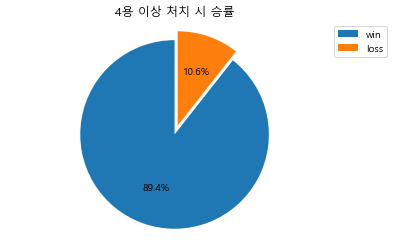

In [16]:
dragon_4kills_fail=df.groupby(by=['dragon_kills','result'])['first_dragon'].count().values[8]+df.groupby(by=['dragon_kills','result'])['first_dragon'].count().values[10]+df.groupby(by=['dragon_kills','result'])['first_dragon'].count().values[12]
dragon_4kills_win=df.groupby(by=['dragon_kills','result'])['first_dragon'].count().values[9]+df.groupby(by=['dragon_kills','result'])['first_dragon'].count().values[11]+df.groupby(by=['dragon_kills','result'])['first_dragon'].count().values[13]+df.groupby(by=['dragon_kills','result'])['first_dragon'].count().values[14]
values=[dragon_4kills_win,dragon_4kills_fail]
label=['win','loss']
explodes=(0,0.1)

plt.pie(values,
       autopct='%1.1f%%',
       startangle=90,
       explode=explodes)
plt.title('4용 이상 처치 시 승률')
plt.axis('equal')
plt.legend(label, loc='upper right', bbox_to_anchor=(1.15,1))
plt.show()

In [17]:
#4용 미만 데이터 제외
print(dragon_4kills_fail)
print(dragon_4kills_win)
print(dragon_4kills_fail+dragon_4kills_win)

3407
28705
32112


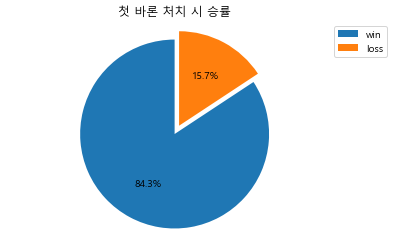

In [18]:
first_baron_fail=df.groupby(by=['first_baron','result'])['first_baron'].count().values[2]
first_baron_win=df.groupby(by=['first_baron','result'])['first_baron'].count().values[3]
values=[first_baron_win,first_baron_fail]
label=['win','loss']
explodes=(0,0.1)

plt.pie(values,
       autopct='%1.1f%%',
       startangle=90,
       explode=explodes)
plt.title('첫 바론 처치 시 승률')
plt.axis('equal')
plt.legend(label, loc='upper right', bbox_to_anchor=(1.15,1))
plt.show()

In [19]:
#바론을 처치하지 않는 데이터 제외
print(first_baron_fail)
print(first_baron_win)
print(first_baron_fail+first_baron_win)

15008
80455
95463


In [20]:
#전체 championid 삽입
from collections import Counter

picks=[]

for i in range(0, len(df)):
    picks.append(df['pick_1'].values[i])
    picks.append(df['pick_2'].values[i])
    picks.append(df['pick_3'].values[i])
    picks.append(df['pick_4'].values[i])
    picks.append(df['pick_5'].values[i])
    
len(picks)

1605510

In [21]:
#championid에 따른 정보가 담긴 json파일 로드
import json

with open('C:/Users/User/Desktop/opgg/champions.json','r', encoding='utf-8') as read_file:
    json_data=json.load(read_file)

dict={}

for i in range(0, len(json_data)):
    dict[json_data[i]['key']]=json_data[i]['id']
    
dict

{'266': 'aatrox',
 '103': 'ahri',
 '84': 'akali',
 '12': 'alistar',
 '32': 'amumu',
 '34': 'anivia',
 '1': 'annie',
 '523': 'aphelios',
 '22': 'ashe',
 '136': 'aurelionsol',
 '268': 'azir',
 '432': 'bard',
 '53': 'blitzcrank',
 '63': 'brand',
 '201': 'braum',
 '51': 'caitlyn',
 '164': 'camille',
 '69': 'cassiopeia',
 '31': 'chogath',
 '42': 'corki',
 '122': 'darius',
 '131': 'diana',
 '119': 'draven',
 '36': 'drmundo',
 '245': 'ekko',
 '60': 'elise',
 '28': 'evelynn',
 '81': 'ezreal',
 '9': 'fiddlesticks',
 '114': 'fiora',
 '105': 'fizz',
 '3': 'galio',
 '41': 'gangplank',
 '86': 'garen',
 '150': 'gnar',
 '79': 'gragas',
 '104': 'graves',
 '120': 'hecarim',
 '74': 'heimerdinger',
 '420': 'illaoi',
 '39': 'irelia',
 '427': 'ivern',
 '40': 'janna',
 '59': 'jarvaniv',
 '24': 'jax',
 '126': 'jayce',
 '202': 'jhin',
 '222': 'jinx',
 '145': 'kaisa',
 '429': 'kalista',
 '43': 'karma',
 '30': 'karthus',
 '38': 'kassadin',
 '55': 'katarina',
 '10': 'kayle',
 '141': 'kayn',
 '85': 'kennen',
 '12

In [22]:
#championid를 영어로 변경
champion_picks_eng=[]

for i in range(0, len(picks)):
    champion_picks_eng.append(dict[str(picks[i])])

In [23]:
#가장 많이 픽 된 챔피언 TOP5
cnt=Counter(champion_picks_eng)
pre_champion=cnt.most_common(50)

pre_champion

[('ezreal', 57740),
 ('lucian', 55437),
 ('caitlyn', 38456),
 ('jhin', 36779),
 ('senna', 36288),
 ('sylas', 36070),
 ('akali', 35554),
 ('ashe', 34380),
 ('ekko', 31543),
 ('thresh', 31272),
 ('leesin', 30747),
 ('lulu', 27340),
 ('pantheon', 26448),
 ('kaisa', 26246),
 ('graves', 25022),
 ('camille', 24998),
 ('nidalee', 22354),
 ('sett', 22328),
 ('renekton', 22227),
 ('irelia', 22184),
 ('lillia', 21756),
 ('missfortune', 21462),
 ('zed', 20485),
 ('hecarim', 19790),
 ('elise', 19638),
 ('yasuo', 19425),
 ('yone', 19386),
 ('lux', 18399),
 ('blitzcrank', 18249),
 ('jayce', 17422),
 ('maokai', 16562),
 ('pyke', 15624),
 ('karma', 15034),
 ('nautilus', 14788),
 ('morgana', 14460),
 ('galio', 14402),
 ('yuumi', 14219),
 ('bard', 13922),
 ('leona', 13733),
 ('karthus', 13583),
 ('zoe', 13426),
 ('jax', 13386),
 ('fiora', 12475),
 ('zac', 12371),
 ('vayne', 12046),
 ('twistedfate', 11988),
 ('shen', 11963),
 ('katarina', 11601),
 ('nunu', 11485),
 ('talon', 11248)]

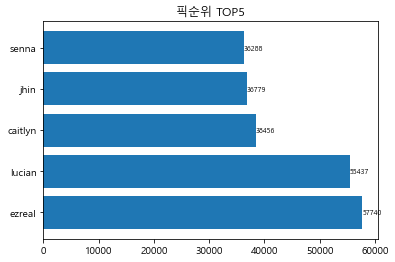

In [24]:
values=[pre_champion[0][1],pre_champion[1][1],pre_champion[2][1],pre_champion[3][1],pre_champion[4][1]]
champion=[pre_champion[0][0],pre_champion[1][0],pre_champion[2][0],pre_champion[3][0],pre_champion[4][0]]


plt.barh(champion, values)
plt.yticks(champion)
plt.title("픽순위 TOP5")

for i, v in enumerate(champion):
    str_val=values[i]
    plt.text(values[i], v, str_val, fontsize=7,
            horizontalalignment='left', verticalalignment='center')

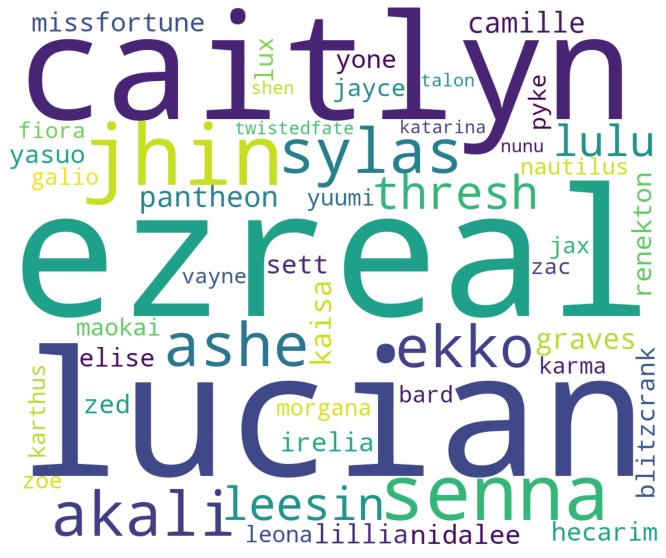

In [25]:
from wordcloud import WordCloud, STOPWORDS

wc_dict={}

for i in range(0, len(pre_champion)):
    wc_dict[pre_champion[i][0]]=pre_champion[i][1]


wc = WordCloud(width=1200,
               height=1000,
               stopwords = STOPWORDS,
               background_color="white",
              ).generate_from_frequencies(wc_dict)

plt.figure(figsize = (15 , 10))
plt.imshow(wc)
plt.axis("off")
plt.show() 

In [27]:
#게임 평균 시간

gameduration=0

for i in range(0,len(df),2):
    gameduration=gameduration+df['gameduration'].values[i]


a=gameduration/(len(df)/2)
# round(a/60, 2)
m,s=divmod(a,60)
m

25.0